In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [3]:
dataset = pd.read_csv('owid-covid-data.csv',parse_dates=['date'],index_col='date')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50301 entries, 2020-03-13 to 2020-10-15
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         50011 non-null  object 
 1   continent                        49721 non-null  object 
 2   location                         50301 non-null  object 
 3   total_cases                      49665 non-null  float64
 4   new_cases                        49439 non-null  float64
 5   new_cases_smoothed               48657 non-null  float64
 6   total_deaths                     49665 non-null  float64
 7   new_deaths                       49439 non-null  float64
 8   new_deaths_smoothed              48657 non-null  float64
 9   total_cases_per_million          49375 non-null  float64
 10  new_cases_per_million            49375 non-null  float64
 11  new_cases_smoothed_per_million   48592 non-null  float64
 12  t

In [5]:
dataset[dataset['location']=='Afghanistan']['2020-03-08':]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-03-08,AFG,Asia,Afghanistan,4.0,3.0,0.429,0.0,0.0,0.000,0.103,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-03-09,AFG,Asia,Afghanistan,NaN,NaN,0.429,NaN,NaN,0.000,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-03-10,AFG,Asia,Afghanistan,NaN,NaN,0.429,NaN,NaN,0.000,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-03-11,AFG,Asia,Afghanistan,7.0,3.0,0.857,0.0,0.0,0.000,0.180,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-03-12,AFG,Asia,Afghanistan,NaN,NaN,0.857,NaN,NaN,0.000,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-11,AFG,Asia,Afghanistan,39703.0,0.0,58.000,1473.0,0.0,1.571,1019.900,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-10-12,AFG,Asia,Afghanistan,39799.0,96.0,65.429,1477.0,4.0,2.143,1022.366,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-10-13,AFG,Asia,Afghanistan,39928.0,129.0,63.143,1480.0,3.0,1.857,1025.679,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50301 entries, 2020-03-13 to 2020-10-15
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         50011 non-null  object 
 1   continent                        49721 non-null  object 
 2   location                         50301 non-null  object 
 3   total_cases                      49665 non-null  float64
 4   new_cases                        49439 non-null  float64
 5   new_cases_smoothed               48657 non-null  float64
 6   total_deaths                     49665 non-null  float64
 7   new_deaths                       49439 non-null  float64
 8   new_deaths_smoothed              48657 non-null  float64
 9   total_cases_per_million          49375 non-null  float64
 10  new_cases_per_million            49375 non-null  float64
 11  new_cases_smoothed_per_million   48592 non-null  float64
 12  t

In [7]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.966500e+04,49439.000000,48657.000000,4.966500e+04,49439.000000,48657.000000,49375.000000,49375.000000,48592.000000,49375.000000,...,44230.000000,29496.000000,44805.000000,46414.000000,35026.000000,34579.000000,21055.000000,40428.000000,49375.000000,43242.000000
mean,1.195808e+05,1560.718845,1545.047819,4.528506e+03,44.221161,44.305880,2208.635648,27.720477,27.006892,63.179023,...,20813.918614,12.227156,251.862129,8.050559,10.787428,32.635691,52.315781,3.104097,73.994241,0.723999
std,1.235767e+06,14074.821975,13848.545713,4.193538e+04,370.399641,360.225437,4566.847850,92.712991,63.570126,150.024977,...,20392.155234,19.301168,117.438071,4.151930,10.475137,13.430938,31.625998,2.522259,7.383849,0.153003
min,0.000000e+00,-8261.000000,-552.000000,0.000000e+00,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,7.300000e+01,0.000000,0.714000,1.000000e+00,0.000000,0.000000,40.322000,0.000000,0.180000,0.076000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.201000e+03,11.000000,16.571000,2.400000e+01,0.000000,0.286000,326.870000,1.755000,3.270500,5.852000,...,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.353500e+04,183.000000,189.571000,2.800000e+02,3.000000,3.286000,2314.697000,20.331000,22.523500,42.794500,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,3.858123e+07,388539.000000,336660.571000,1.093140e+06,10468.000000,7459.143000,45029.246000,8652.658000,1236.094000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
dataset.sort_index(inplace=True)
df_preprocessed = dataset.copy()

In [9]:
#new vako column ma 0 fill garne
for column in dataset.columns:
    if 'new' in column:
        df_preprocessed[column] = df_preprocessed[column].fillna(0)
    else:
        df_preprocessed[column] = df_preprocessed[column].fillna(method='ffill').fillna(0)

In [10]:
def countires_with_most(df,feature,top=5,ax=None,):
    
    temp = df.groupby('location').apply(lambda x:x[feature].mean(skipna=True)).dropna().sort_values(ascending=False)
    temp.drop(['World'],inplace=True)
    fig = temp[:top].plot(kind='bar',ax=ax) if ax is not None else temp[:top].plot(kind='bar')
    plt.title('Countires with most average '+ " ".join(feature.split('_')))
    plt.xticks(rotation='45')
#     plt.show()

def countires_with_least(df,feature,top=5,ax=None):    
    temp = df.groupby('location').apply(lambda x:x[feature].mean(skipna=True)).dropna().sort_values()
    temp.drop(['World'],inplace=True)
    fig = temp[:top].plot(kind='bar',ax=ax) if ax is not None else temp[:top].plot(kind='bar')
    plt.title('Countires with least average '+ " ".join(feature.split('_')))
    plt.xticks(rotation='45')
#     plt.show()

Text(0.5, 1.0, 'Countires with most and  least average new cases')

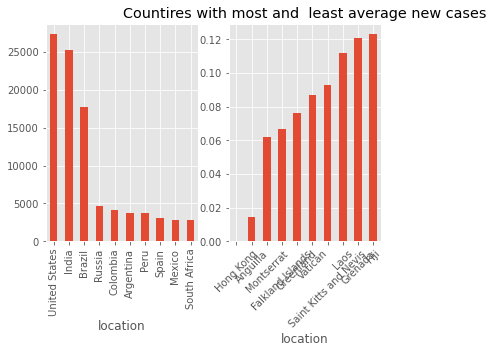

In [11]:
fig,ax = plt.subplots(1,2)
feature = 'new_cases'
countires_with_most(df_preprocessed,feature,10,ax=ax[0])
countires_with_least(df_preprocessed,feature,10,ax=ax[1])
plt.title('Countires with most and  least average '+ " ".join(feature.split('_')))

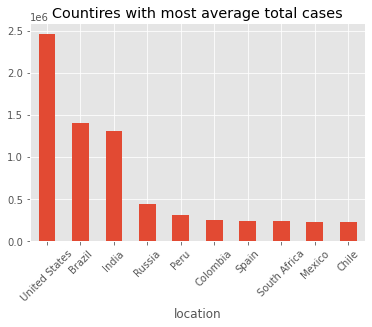

In [12]:
countires_with_most(df_preprocessed,'total_cases',10)

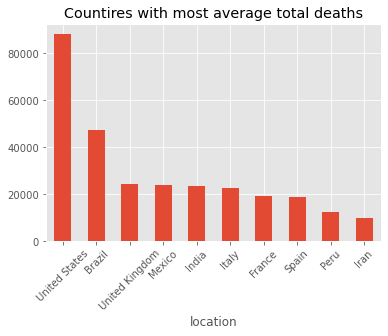

In [13]:
countires_with_most(df_preprocessed,'total_deaths',10)

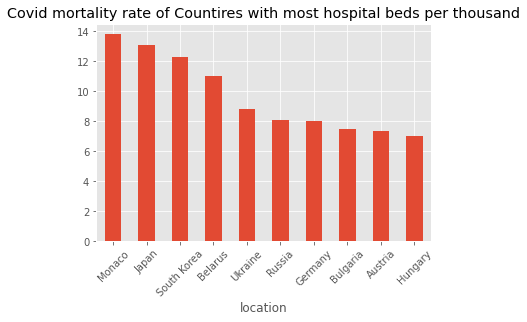

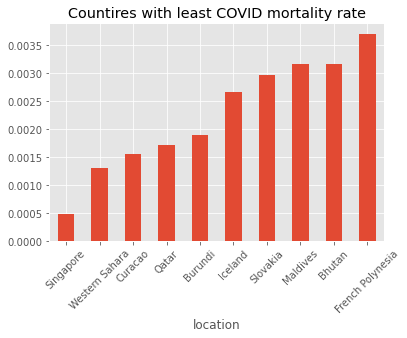

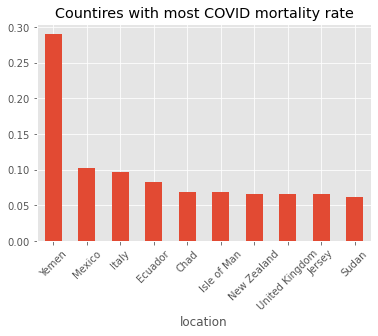

In [14]:
hospital_beds = df_preprocessed.groupby('location').apply(lambda x:x['hospital_beds_per_thousand'].mean(skipna=True)).dropna().sort_values(ascending=False)
hospital_beds[:10].plot(kind='bar')
plt.title('Countires with most hospital beds per thousand')
plt.xticks(rotation='45')

total_deaths = df_preprocessed.groupby('location').apply(lambda x:x['total_deaths'].max(skipna=True))
total_cases = df_preprocessed.groupby('location').apply(lambda x:x['total_cases'].max(skipna=True))

total_deaths.drop(['World'],inplace=True)
total_cases.drop(['World'],inplace=True)

# # total_deaths[:10].plot('bar')
covid_mortality_rate = pd.Series(total_deaths.values/total_cases.values)
covid_mortality_rate.index = total_cases.index
covid_mortality_rate.sort_values(ascending=True,inplace=True)
covid_mortality_rate = covid_mortality_rate[covid_mortality_rate > 0]
hospital_beds_covid_mortality_rate = hospital_beds+covid_mortality_rate
plt.title('Covid mortality rate of Countires with most hospital beds per thousand')
plt.show()

covid_mortality_rate[:10].plot(kind='bar')

plt.title('Countires with least COVID mortality rate')
plt.xticks(rotation='45')
plt.show()

covid_mortality_rate[::-1][:10].plot(kind='bar')

plt.title('Countires with most COVID mortality rate')
plt.xticks(rotation='45')

plt.show()

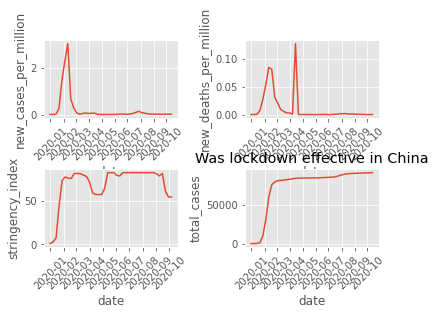

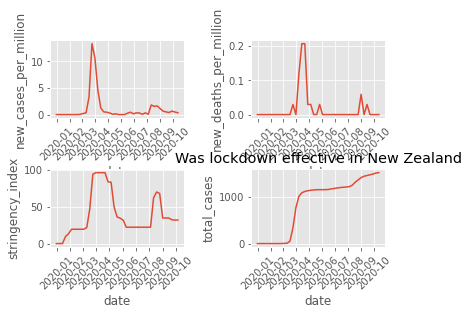

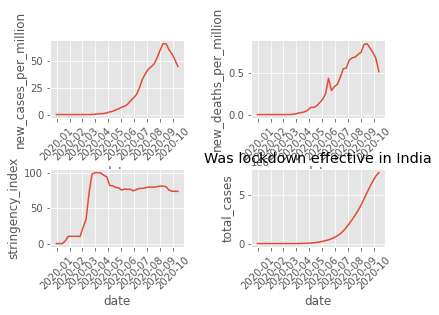

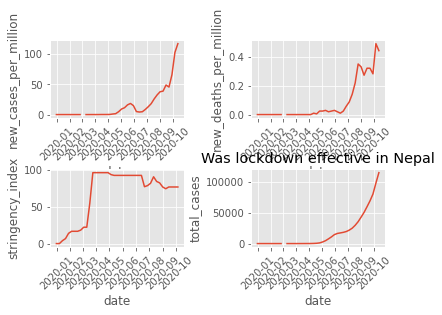

In [15]:
def visualize(country,features):
    df = dataset[df_preprocessed['location']==country].resample('7D').mean()
    length = len(features)
    length = length if length % 2 == 0 else length + 1
    row = 2
    col = length//2
    fig,ax = plt.subplots(row,col)
    fig.tight_layout(pad=3.0)
    i=0
    j=0
    if col == 1:
        
        for feature in features:
    #         j=0
            sns.lineplot(x='date',y=feature,data=df,ax=ax[i])
    #         j=j+1 if j < col else 0
            i=i+1 
    else:
        for feature in features:
            sns.lineplot(x='date',y=feature,data=df,ax=ax[i][j])
            i=i+1 if j+1 == col  else i
            j=j+1 if j+1 < col else 0
            
    for ax in fig.axes:
        ax.tick_params(axis='x',labelrotation=45)
    plt.title("Was lockdown effective in " +country,loc="center")
        
visualize('China',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])    
visualize('New Zealand',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])
visualize('India',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])
visualize('Nepal',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])

#Was lockdown effective ?
# Yes, if applied at the right time. As we can see in countries like China and Ne Zealand
# as the number of cases grew government applied strict policies which can be infrerred through 
# the stringency index. Due to which, the number of new cases and deaths were at a steep decline.
# But in countries like Nepal and India where lockdown was imposed when number of cases were almost zero
# the number of cases and deaths are still rising to its all time high.

In [16]:
#interactive charts using bokeh
from bokeh.plotting import figure, output_notebook , show , output_file,reset_output
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral5,Spectral10
import bokeh 
from bokeh.models import HoverTool
from bokeh.models.sources import ColumnDataSource
from bokeh.models.formatters import DatetimeTickFormatter

reset_output()
# output_file('bokeh.html')



In [17]:
output_notebook()

Loading BokehJS ...

In [18]:
# top_10_countries(df_preprocessed,'total_deaths')#New cases of top 5 hotspot countires by time
def get_top_10_countries(df,feature):
    temp = df.groupby('location').apply(lambda x:x[[feature]].max(skipna=True)).dropna().sort_values(by=feature,ascending=False)
    temp.drop(['World'],inplace=True)
    temp.reset_index(inplace=True)
    return temp[:10]
feature = 'new_cases_smoothed'
temp = get_top_10_countries(df_preprocessed,feature)

p = figure(title="Covid 19 new cases smoothed ", x_axis_label='Date', y_axis_label='# of new cases')

# test_1 = df_preprocessed[df_preprocessed['location']=='United States']
colormap=factor_cmap(field_name="location",palette=Spectral10, factors=['a']*10)
for i,country in enumerate(temp.location):
    test = df_preprocessed[df_preprocessed['location']==country] 
    p.line(x='date',y=feature,source=test,  line_width=2,color=colormap['transform'].palette[i])
    
p.legend.location = "top_left"
p.legend.click_policy="hide"
p.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
p.left[0].formatter.use_scientific = False

p.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))
show(p)


C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [19]:
# from bokeh.models.ranges import Range
def top_10_countries(df,feature):
    if "new" in feature:
        temp = df.groupby('location').apply(lambda x:x[[feature]].mean(skipna=True)).dropna().sort_values(by=feature,ascending=False)
        title = "Top 10 countries with highest average "+" ".join(feature.split('_'))
    if "total" in feature:
        temp = df.groupby('location').apply(lambda x:x[[feature]].max(skipna=True)).dropna().sort_values(by=feature,ascending=False)
        title = "Top 10 countries with highest "+" ".join(feature.split('_'))
    
    temp.drop(['World'],inplace=True)
    temp.reset_index(inplace=True)
    temp = temp[:10]
#     print(temp.loc[0])   
    cds_bar_df = ColumnDataSource(temp)
#     temp = pd.DataFrame(temp.reset_index(),columns=['location','total_deaths'])
    countries = temp['location'].tolist()
    
    colormap=factor_cmap(field_name="location",palette=Spectral10, factors=countries)
    bar_chart = figure(x_range=countries,title = title,plot_height=300,plot_width=600)
    bar_chart.vbar(x='location',top=feature,width=0.5,source=cds_bar_df,color=colormap)
    show(bar_chart)
    
top_10_countries(df_preprocessed,'new_cases')


In [20]:
top_10_countries(df_preprocessed,'new_deaths')


In [21]:
top_10_countries(df_preprocessed,'total_deaths')

In [22]:
def get_data_by_country(country):
    return df_preprocessed[df_preprocessed['location']==country]
get_data_by_country("Nepal").head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-01,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-02,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-03,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-04,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [23]:
#Link plot New cases new deaths stringency index total cases

from bokeh.layouts import gridplot
country = "United States"
feature = 'new_cases_smoothed'
data = get_data_by_country("United States")

linked_plot_1 = figure(width=350,height=250)
linked_plot_1.line(x='date',y=feature,source=data,line_width=2)
# max_feature_value = data.
linked_plot_1.circle_cross(x=data[[feature]].iloc[data[feature].argmax()].name,y=data[feature].max(),color='red',size=10,fill_alpha=0.5)
linked_plot_1.legend.location = "top_left"
linked_plot_1.legend.click_policy="hide"
linked_plot_1.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
linked_plot_1.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))

feature = 'new_deaths_smoothed'

linked_plot_2 = figure(width=350,height=250,x_range=linked_plot_1.x_range)
linked_plot_2.line(x='date',y=feature,source=data,line_width=2)
linked_plot_2.circle_cross(x=data[[feature]].iloc[data[feature].argmax()].name,y=data[feature].max(),color='red',size=10,fill_alpha=0.5)

linked_plot_2.legend.location = "top_left"
linked_plot_2.legend.click_policy="hide"
linked_plot_2.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
linked_plot_2.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))

feature = 'stringency_index'

linked_plot_3= figure(width=350,height=250,x_range=linked_plot_1.x_range)
linked_plot_3.line(x='date',y=feature,source=data,line_width=2)
linked_plot_3.legend.location = "top_left"
linked_plot_3.legend.click_policy="hide"
linked_plot_3.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
linked_plot_3.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))


linked_grid_plot = gridplot([[linked_plot_1,linked_plot_2,linked_plot_3]])



show(linked_grid_plot)

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [24]:
df = df_preprocessed.drop(['iso_code','continent','location','tests_units'],axis=1)
df = df.drop(df.columns[list(map(lambda x:"smoothed" in x,df.columns))],axis=1)
df = df.drop(df.columns[list(map(lambda x:"_per_" in x,df.columns))],axis=1)


In [25]:
# df[scaled.columns] = scaled[scaled.columns]
#Scaling data

from sklearn.preprocessing import StandardScaler,MinMaxScaler

ss = StandardScaler()
mms = MinMaxScaler()

scaled_df = ss.fit_transform(df)
df[df.columns] = scaled_df

In [26]:
df.head()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,stringency_index,population,population_density,...,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,-0.096195,-0.109923,-0.107345,-0.118347,-0.144053,-0.213177,-0.686074,-2.154712,-0.136738,-0.079304,...,-1.088492,-1.093762,-0.636976,-1.022748,1.867279,-0.763302,0.320708,-1.683992,0.203907,0.524767
2019-12-31,-0.096195,-0.109923,-0.107345,-0.118347,-0.144053,-0.213177,-0.686074,-2.154712,-0.127544,-0.151387,...,-1.278985,-1.230332,-0.636976,0.559651,2.207930,-0.906512,0.350364,-1.683992,0.539640,0.916929
2019-12-31,-0.096195,-0.109923,-0.107345,-0.118347,-0.144053,-0.213177,-0.686074,-2.154712,-0.044812,-0.095125,...,2.190959,2.419423,-0.533308,-1.185451,-0.785955,0.869289,-0.361383,-1.683992,1.289625,1.028041
2019-12-31,-0.096195,-0.109923,-0.107345,-0.118347,-0.144053,-0.213177,-0.686074,-2.154712,-0.128991,-0.154816,...,1.585221,1.840628,-0.600692,-0.912358,-0.409320,1.690358,-0.131548,-1.683992,1.022934,1.211050
2019-12-31,-0.096195,-0.109923,-0.107345,-0.118347,-0.144053,-0.213177,-0.686074,-2.154712,-0.128991,-0.154816,...,1.585221,1.840628,-0.600692,-0.912358,-0.409320,1.690358,-0.131548,-1.683992,1.022934,1.211050


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#target = total_cases
newX = df.drop('total_cases',axis=1) 
newY = df['total_cases']

X_train,X_test,Y_train,Y_test = train_test_split(newX,newY,test_size=0.2,random_state=41,shuffle=False)

In [105]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, Y_train)


Ridge(alpha=0.01)

In [106]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, Y_train)


Ridge(alpha=100)

In [108]:
train_score,test_score

(0.9712719584824174, 0.9285763356242053)

In [109]:
Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)
Ridge_train_score,Ridge_test_score

(0.9712719584819501, 0.9285760683708584)

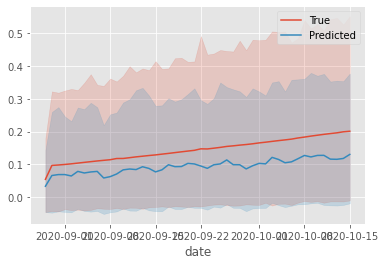

In [110]:
predicted= rr.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=Y_test.index,y=Y_test.values,ax=ax)
sns.lineplot(x=Y_test.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])
# plt.xticks.for

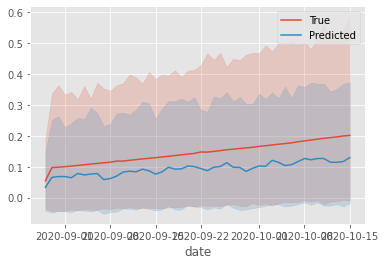

In [112]:
predicted= rr100.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=Y_test.index,y=Y_test.values,ax=ax)
sns.lineplot(x=Y_test.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

In [115]:
#KNNREGRESSOR
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(algorithm='ball_tree', 
                            leaf_size=50, 
                            metric='minkowski',
                            metric_params=None, 
                            n_jobs=-1, 
                            n_neighbors=14, 
                            p=2,
                            weights='uniform')
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.8913279283721207


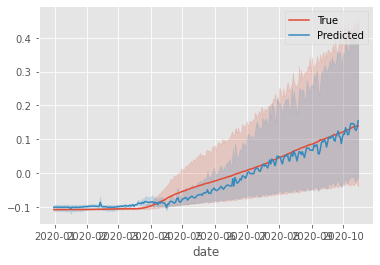

In [116]:
#Prediction on whole data
predicted = rr.predict(df.drop('total_deaths',axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=df.index,y=df['total_deaths'].values,ax=ax)
sns.lineplot(x=df.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

In [117]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)

SVR()

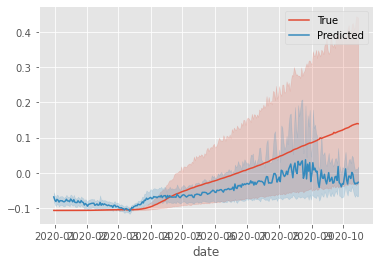

In [121]:
#Prediction on whole data
predicted = regressor.predict(df.drop('total_deaths',axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=df.index,y=df['total_deaths'].values,ax=ax)
sns.lineplot(x=df.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb_reg=xgb.XGBRegressor()

prams={
    'learning_rate':[0.03,0.05,0.1],
    'n_estimators':[500,2000,4000],
    'max_depth':[5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
# tscv = TimeSeriesSplit(n_splits=3)
random_clf=RandomizedSearchCV(xgb_reg, param_distributions=prams,verbose=1,
                                n_jobs=3,  n_iter=10)
random_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
